### Tax Returns Credit Breakdown Josh Work

In [62]:
#gauss won't let me save in TaxReturnsCreditBreakDown, doing work here
#note to self-try education tax credit possibly

## Types of Tax Credits
A tax credit takes the amount off the total final tax bill, instead of deducting it from your taxable income.

| Number Filed (Col) | Amount Filed (Col) | Form | Type of Return | Description |
| --- | --- | --- | --- | --- |
| `N07230` | `A07230` | Schedule 3 | Education | $2,500 per student, used toward course materials and tuition |
| `N07240` | `A07240` | Schedule 3 | Retirement Savings Contribution | 20% of contributions to a qualifying retirement plans |
| `N85770` | `A85770` | 8962 | Insurence Premium | Monthly insurance payment when enrolled in specific plans |
| `N07180` | `A07180` | Schedule 3 | Child/Dependent Care | Children under 13, or dependents who are unable to take care of them self |
| `N07225` | `A07225` | 1040 | w/ Child/Dependent | Having any child under 18 or dependent |
| `N07300` | `A07300` | Schedule 3 | w/ Foreign Tax | Having any taxes imposed on you by a foreign country |
| `N11070` | `A11070` | 1040 | w/ Additional Child | Having 3 or more children |
| `N07260` | `A07260` | Schedule 3 | w/ Residential Energy | Energy efficiency improvements |
| `N09400` | `A09400` | Schedule 3 | w/ Self-Employment | Being self-employed |
| `N10960` | `A10960` | 1040 | w/ Refundable Education | Having to cover the cost of higher education |
| `N11450` | `A11450` | Schedule 3 | w/ Sick/Family Leave | Having to take leave from job for sickness or family reasons |
| `N10970` | `A10970` | 1040 | w/ Recovery Rebate | Anyone one with income less than \$75K for 2021  |



## Info To Find
And make some charts, and anything else you want to review
(Delete these notes when complete)
 - total $ amount -DID SO by Josh
 
 - total $ amount, by credit type
 
 - total $ amount, by tax bracket -DID SO by Josh
 
 - total $ amount, by credit type, by tax bracket

In [31]:
TAX_CREDIT_AMT  = [ "A07225", "A11070", "A10960", "A10970", "A07230", "A07240", "A07180", "A07300", "A07260", "A09400", "A11450", "A11560" ]
TAX_CREDIT_NUM  = [ "N07225", "N11070", "N10960", "N10970", "N07230", "N07240", "N07180", "N07300", "N07260", "N09400", "N11450", "N11560" ]

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("./data/tax_data_2020.csv")
df = df[df.zipcode != 0]

In [21]:
def toMillion(amount):
    return round(amount / 1000000, 2)

def toBillion(amount):
    return round(amount / 1000000000, 2)

def toTrillion(amount):
    return round(amount / 1000000000000, 10)

### Initial Tax Credit Exploration

In [22]:
creditByTaxBracket = df.groupby('agi_stub')[TAX_CREDIT_AMT].sum()
creditByTaxBracket

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
1,1115635.0,12440779.0,1911061.0,18575709.0,785537.0,344389.0,44731.0,9697.0,14497.0,9456899.0,602488.0,860478.0
2,14951003.0,15865479.0,1337258.0,8027248.0,2609167.0,1144185.0,664627.0,60143.0,306384.0,8878458.0,412745.0,662673.0
3,16466426.0,3433735.0,722944.0,4383574.0,1510657.0,246002.0,404364.0,115745.0,550610.0,6721324.0,175812.0,96287.0
4,13901063.0,518995.0,468202.0,2740478.0,1007249.0,0.0,345300.0,137510.0,479735.0,5342967.0,72158.0,1183.0
5,27241973.0,50835.0,1030291.0,5900588.0,1803549.0,0.0,875315.0,711611.0,1212207.0,13677333.0,153746.0,0.0
6,9661820.0,63.0,0.0,14003.0,0.0,0.0,397114.0,10092080.0,619033.0,20392362.0,46311.0,0.0


<AxesSubplot: xlabel='agi_stub'>

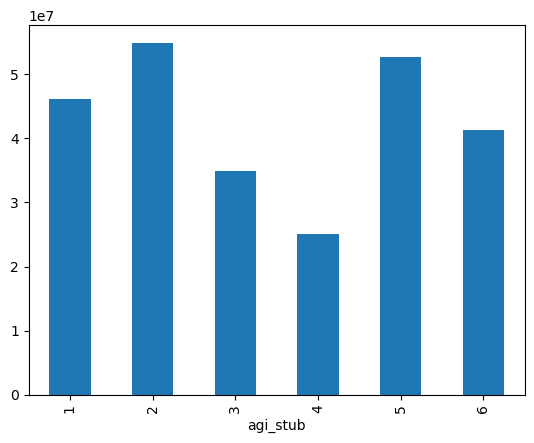

In [24]:
creditByTaxBracket.sum(axis=1).plot.bar()

In [28]:
toBillion(creditByTaxBracket.sum(axis=1)*1000)

agi_stub
1    46.16
2    54.92
3    34.83
4    25.01
5    52.66
6    41.22
dtype: float64

It seems that rich people (people with 100,000 to 200,000 dollar income) have the 2nd highest amount of $ from tax credits, and poor people (people with 25k to 50k dollar incomes) have the most amount of money from tax credits. These are important considerations for desigining a new tax code. Poor people get around 55 billion dollars in tax credits while rich people get around 53 billion dollars in tax credits.

<AxesSubplot: xlabel='agi_stub'>

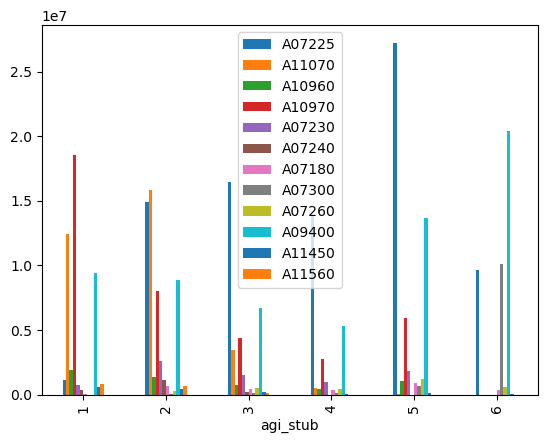

In [25]:
creditByTaxBracket.plot.bar()

From an initial look at the data, it looks like very rich people (people with >$200,000 annual income) have a relatively great amount of money from self employed tax credits compared to their other tax credits, and that is the tax credit they have the most money from. Perhaps this is from very rich people setting up their own buisnesses with their great wealth? I can't tell what tax credit the very big purple bar for 5 is referring to, so I will try to guess what that is and focus on that next.

### Child Dependent Tax Credit Exploration

In [35]:
toBillion(creditByTaxBracket['A07225']*1000)

agi_stub
1     1.12
2    14.95
3    16.47
4    13.90
5    27.24
6     9.66
Name: A07225, dtype: float64

Rich people make relatively massive amounts of money from child dependent tax credits compared to the other tax brackets. Surpisingly, very poor people (1 dollar to 25,000 income people) and very rich people have an extremely low amount of money from child dependent tax credits. I am more surpised by the very poor people result. Perhaps this indicates very poor people don't have lots of kids?

<AxesSubplot: xlabel='agi_stub'>

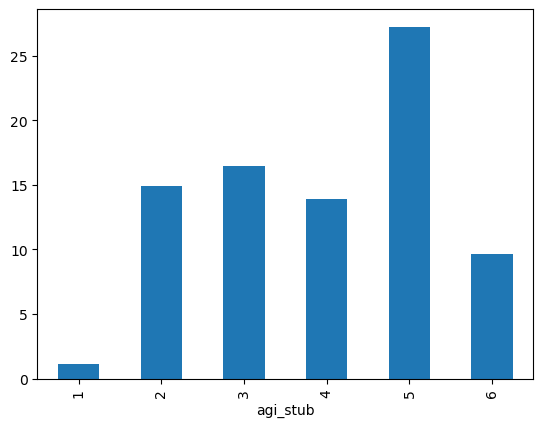

In [36]:
toBillion(creditByTaxBracket['A07225']*1000).plot.bar()

graph for visual reference

Let's focus on poor people tax credits next

## Poor People Tax Credits

In [40]:
poorTaxCredits = creditByTaxBracket.loc[[2]]
poorTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
2,1.495100e+10,1.586548e+10,1.337258e+09,8.027248e+09,2.609167e+09,1.144185e+09,664627000.0,60143000.0,306384000.0,8.878458e+09,412745000.0,662673000.0


In [42]:
toBillion(poorTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
2,14.95,15.87,1.34,8.03,2.61,1.14,0.66,0.06,0.31,8.88,0.41,0.66


Poor people get over 15.87 billion dollars from the additional child tax credit, the tax credit they have the most money from, while having only 60 million dollars from foreign tax credits. Also, poor people make over 14.95 billion dollars from child dependent tax credits. It seems that poor people have a bunch more children per household then 3 and very few poor households pay foreign taxes. When designing a new tax code Congress should not get rid of the child dependent or additional child tax credits it seems to avoid severly hurting the poor.

<AxesSubplot: xlabel='agi_stub'>

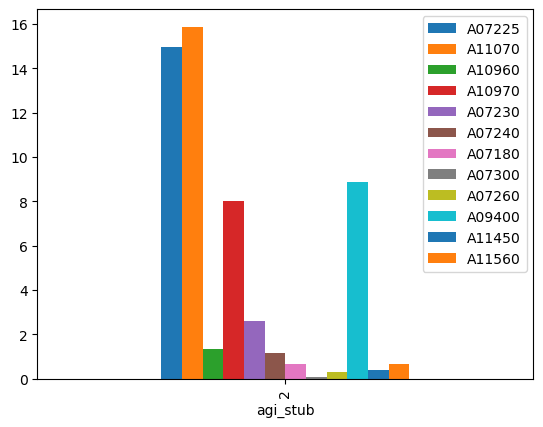

In [44]:
toBillion(poorTaxCredits*1000).plot.bar()

graph for visual reference

Let's focus on very poor people next.

## Very Poor People Tax Credits

In [47]:
veryPoorTaxCredits = creditByTaxBracket.loc[[1]]
veryPoorTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
1,1.115635e+09,1.244078e+10,1.911061e+09,1.857571e+10,785537000.0,344389000.0,44731000.0,9697000.0,14497000.0,9.456899e+09,602488000.0,860478000.0


In [48]:
toBillion(veryPoorTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
1,1.12,12.44,1.91,18.58,0.79,0.34,0.04,0.01,0.01,9.46,0.6,0.86


Very poor people get over 18.58 billion dollars from recovery rebate tax credits. This does make sense given the definition of the recovery rebate tax credit. Very poor people do not have much retirement savings it seems and apparently do not get much foreign tax paid credits or education tax credits or residental energy tax credits. Very poor people do make over 12.44 billion dollars from the additional child tax credit. This is surprising given that very poor people apparently make relatively little money from the child dependent tax credit. It seems that very poor people actually have a bunch of children over 3 in their households. It looks like that Congress should not abolish the additional children tax credit when designing a new tax code to avoid severely hurting very poor people. 

<AxesSubplot: xlabel='agi_stub'>

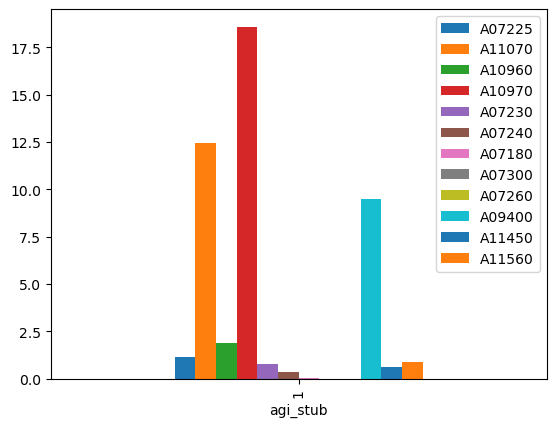

In [49]:
toBillion(veryPoorTaxCredits*1000).plot.bar()

graph for visual reference

Let's focus on very rich people next

## Very Rich People Tax Credits

In [50]:
veryRichTaxCredits = creditByTaxBracket.loc[[6]]
veryRichTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
6,9.661820e+09,63000.0,0.0,14003000.0,0.0,0.0,397114000.0,1.009208e+10,619033000.0,2.039236e+10,46311000.0,0.0


In [51]:
toBillion(veryRichTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
6,9.66,0.0,0.0,0.01,0.0,0.0,0.4,10.09,0.62,20.39,0.05,0.0


Very rich people make over 20.39 billion dollars from the self employed tax credit as explained above. Very rich people also make over 10.09 billion dollars from the foreign tax paid credit (probably from lots of very rich people probably also being foreign nationals or something similar) and 9.66 billion dollars from the child dependent tax credit. They make relatively very little money from the other tax credits, however. It seems that if Congress wants to not hurt very rich people when designing a new tax code, they should not get rid of the self-employed tax credit or the foreign tax paid credit or the child dependent tax credit.

<AxesSubplot: xlabel='agi_stub'>

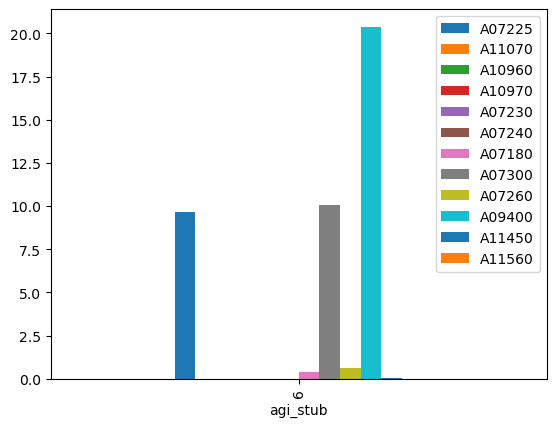

In [52]:
toBillion(veryRichTaxCredits*1000).plot.bar()

graph for visual reference

Let's focus on rich people next

## Rich People Tax Credits

In [53]:
richTaxCredits = creditByTaxBracket.loc[[5]]
richTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
5,2.724197e+10,50835000.0,1.030291e+09,5.900588e+09,1.803549e+09,0.0,875315000.0,711611000.0,1.212207e+09,1.367733e+10,153746000.0,0.0


In [54]:
toBillion(richTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
5,27.24,0.05,1.03,5.9,1.8,0.0,0.88,0.71,1.21,13.68,0.15,0.0


Rich people make over 27.24 billion dollars from the child dependent tax credit and over 13.68 billion dollars from the self-employed tax credit and around 5.9 billion dollars from the recovery rebate tax credit. The recovery rebate finding is surprising, as rich people are supposed to make 100,000 to 200,000 annual income according to the data documentation. Covid-19 probably accounts for this, however. Rich people make relatively little money from the other tax credits. It seems that if Congress wants to not hurt rich people when designing a new tax code, they should not get rid of the child-dependent tax credit or the self-employed tax credit or the recovery rebate tax credit. 

<AxesSubplot: xlabel='agi_stub'>

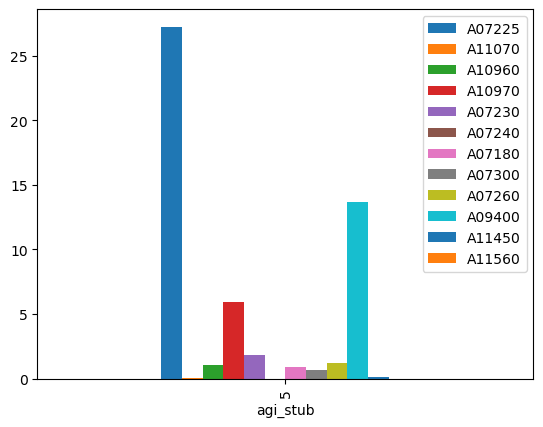

In [56]:
toBillion(richTaxCredits*1000).plot.bar()

graph for visual reference

Let's focus on somewhat-rich people (people with 75k to 100k dollar annual incomes) next.

## Somewhat-Rich People Tax Credits

In [57]:
somewhatRichTaxCredits = creditByTaxBracket.loc[[4]]
somewhatRichTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
4,1.390106e+10,518995000.0,468202000.0,2.740478e+09,1.007249e+09,0.0,345300000.0,137510000.0,479735000.0,5.342967e+09,72158000.0,1183000.0


In [58]:
toBillion(somewhatRichTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
4,13.9,0.52,0.47,2.74,1.01,0.0,0.35,0.14,0.48,5.34,0.07,0.0


Somewhat-rich people make over 13.9 billion dollars from the child dependent tax credit. They make around 5.34 billion dollars from the self-employed tax credit. They make around 2.74 billion dollars from the recovery rebate tax credit. They make relatively little money from the other tax credits. It seems that if Congress wants to not hurt somewhat-rich people when designing a new tax code, they should not get rid of the child dependent tax credit or the self-employed tax credit or the recovery rebate tax credit.

<AxesSubplot: xlabel='agi_stub'>

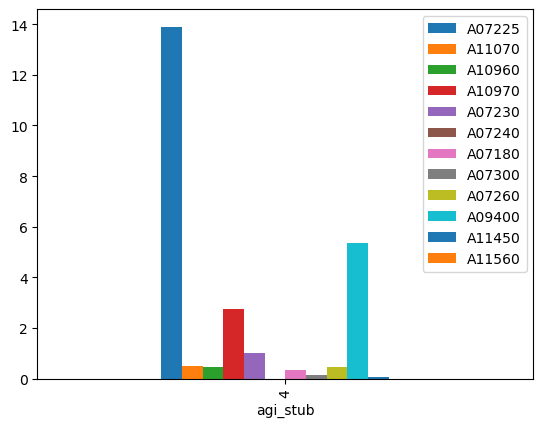

In [63]:
toBillion(somewhatRichTaxCredits*1000).plot.bar()

graph for visual reference

Let's focus on medium people (people with 50k to 75k dollar annual incomes) next.

## Medium People Tax Credits

In [64]:
mediumPeopleTaxCredits = creditByTaxBracket.loc[[3]]
mediumPeopleTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
3,1.646643e+10,3.433735e+09,722944000.0,4.383574e+09,1.510657e+09,246002000.0,404364000.0,115745000.0,550610000.0,6.721324e+09,175812000.0,96287000.0


In [66]:
toBillion(mediumPeopleTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,
3,16.47,3.43,0.72,4.38,1.51,0.25,0.4,0.12,0.55,6.72,0.18,0.1


Medium people make over 16.47 billion dollars from the child dependent tax credit, around 6.72 billion dollars from the self-employed tax credit, around 4.38 billion dollars from the recovery rebate tax credit, around 3.43 billion dollars from the additional child tax credit, and around 1.51 billion dollars from the education tax credit. They make relatively little money from the other tax credits. It seems that if Congress wants to not hurt medium people when making a new tax code, they should not get rid of the child dependent tax credit, the self-employed tax credit, the recovery rebate tax credit, the additional child tax credit, or the education tax credit.

<AxesSubplot: xlabel='agi_stub'>

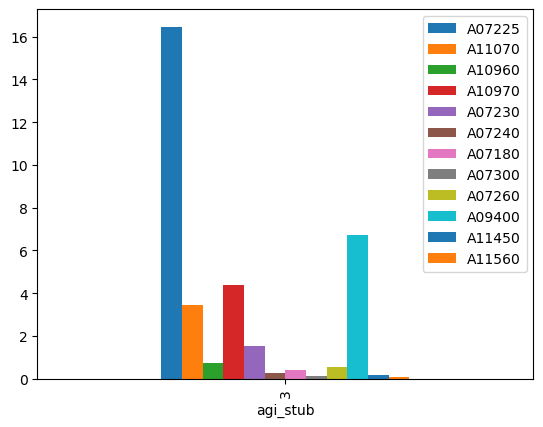

In [67]:
toBillion(mediumPeopleTaxCredits*1000).plot.bar()

graph for visual reference

## Overall Observations So Far

Overall, it seems that so far that most of the income tax brackets make a lot of money from the child dependent tax credit and recovery rebate tax credit. Medium, somewhat-rich, rich, and very rich people make a lot of money from the self-employed tax credit. Poor and very poor people make a lot of money from the additional child tax credit. All of these are important considerations to take into consideration when designing a new tax code.

Let's go quickly get the total amount of money made from tax credits overall.

## Total Amount of Money Made From Tax Credits Overall

In [72]:
toBillion(df[TAX_CREDIT_AMT].sum().sum()*1000)

254.8

A total of around 254.8 billion dollars has been made overall from tax credits. This is certainly a large amount of money, though the total tax income for the U.S. (for 2020 at least) is around 1.6 trillion dollars which dwarfs this amount I will note.

Let's now go focus on various tax credits and how much money is made from them for different tax brackets. We will explore the education tax credit first, as I think that is important to explore.

## Exploration of Education Tax Credit

In [77]:
toBillion(df['A07230'].sum()*1000)

7.72

A total of around 7.72 billion dollars has been made from the education tax credit. Let's check the education tax credit for different tax brackets.

In [87]:
toBillion(creditByTaxBracket['A07230']*1000)

agi_stub
1    0.79
2    2.61
3    1.51
4    1.01
5    1.80
6    0.00
Name: A07230, dtype: float64

Poor people make the most amount of money from the education tax credit, making 2.61 billion dollars, while very rich people make no money whatsover. Very rich people making no money from the education tax credit is surprising, as one would expect even very rich people to at least use somewhat the education tax credit, as they have to educate their kids just like everyone else. Perhaps this indicates that very rich people very heavily use private schools? Rich people make around 1.80 billion dollars from the education tax credit, the second highest amount. It seems that poor people probably have lots of government assistance for getting education, which is not surprising. However, I don't know why rich people make lots of money from the education tax credit. Perhaps that should be investigated further. Very poor people make 0.79 billion dollars from the education tax credit, the 2nd lowest amount, which is also surprising. Perhaps that too should be investigated further. Overall though it seems that for designing a new tax code Congress should not get rid of the education tax credit or else poor people will be hurt a lot, especially education-wise.

<AxesSubplot: xlabel='agi_stub'>

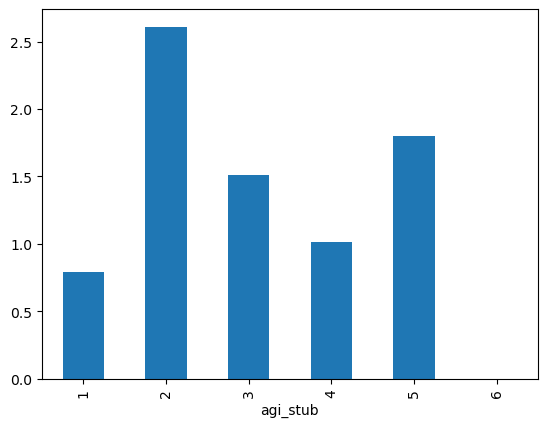

In [88]:
toBillion(creditByTaxBracket['A07230']*1000).plot.bar()

graph for visual reference

Let's move onto exploring the retirement savings contribution tax credit, which I think may have important insights to uncover.

## Exploration of Retirement Savings Contribution Tax Credit

In [89]:
toBillion(df['A07240'].sum()*1000)

1.73

Around 1.73 billion dollars total has been made from the retirement savings contribution tax credit. Let's check the tax credit for different tax brackets.

In [90]:
toBillion(creditByTaxBracket['A07240']*1000)

agi_stub
1    0.34
2    1.14
3    0.25
4    0.00
5    0.00
6    0.00
Name: A07240, dtype: float64

Poor people make around 1.14 billion dollars from the retirement savings contribution tax credit, while somewhat-rich, rich, and very rich people make no money whatsover. Very poor people make around 0.34 billion dollars and medium people make around 0.25 billion dollars. Research by me on this tax credit indicates that these results indicate to me that somewhat rich to very rich people probably make too much money to be eligible for this tax credit. Very poor people surprisingly make relatively little money from this tax credit. Perhaps their very small income makes them unable to spare money to contribute to retirement savings? Perhaps that should be investigated further if possible. Poor people it seems do have the income to spare to make retirement savings contributions. Overall, it seems that for designing a new tax code Congress should not get rid of the retirement savings contribution tax credit to avoid hurting poor people a lot.